**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [178]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.metrics import pairwise_distances
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#%load_ext pycodestyle_magic

In [241]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase,
                             KNeighborsMixin,
                             SupervisedIntegerMixin,
                             ClassifierMixin):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        
        self._init_params(n_neighbors=n_neighbors,
                          algorithm=algorithm)
        
    def fit(self, X, y):
        self._X_train = X
        self._y_train = y
        
    def _predict(self, X):
        return np.bincount(x).argmax()
        
    def predict(self, X):
        dist = pairwise_distances(X, self._X_train)
        neigh_ind = np.argpartition(dist, self.n_neighbors)[:, :self.n_neighbors]
        neigh_el = self._y_train[neigh_ind].astype('int64')
        return np.apply_along_axis(self._predict, 1, neigh_el)
        
    def predict_proba(self, X):
        pass

    def score(self, X, y):
        return np.average(y == self.predict(X))

**IRIS**

In [180]:
iris = datasets.load_iris()

In [181]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [210]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [183]:
%time clf.fit(X_train, y_train)

CPU times: user 910 µs, sys: 315 µs, total: 1.22 ms
Wall time: 1.09 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [211]:
%time my_clf.fit(X_train, y_train)

CPU times: user 159 ms, sys: 141 ms, total: 300 ms
Wall time: 298 ms


In [185]:
%time clf.predict(X_test)

CPU times: user 1.42 ms, sys: 222 µs, total: 1.64 ms
Wall time: 1.54 ms


array([1, 1, 1, 0, 1, 1, 0, 0, 2, 2, 1, 0, 0, 2, 1])

In [186]:
%time my_clf.predict(X_test)

CPU times: user 75.6 ms, sys: 18.8 ms, total: 94.5 ms
Wall time: 149 ms


array([1, 1, 1, 0, 1, 1, 0, 0, 2, 2, 1, 0, 0, 2, 1])

In [187]:
%time clf.predict_proba(X_test)

CPU times: user 1.23 ms, sys: 457 µs, total: 1.69 ms
Wall time: 1.29 ms


array([[ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0.5,  0.5],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  1. ,  0. ]])

In [ ]:
%time my_clf.predict_proba(X_test)

In [188]:
clf.score(X_test, y_test)

0.8666666666666667

In [189]:
my_clf.score(X_test, y_test)

0.8666666666666667

Задание 3

In [249]:
results = []
neighbours_range = range(1, 40)
n_loops = 1000
for n_neigh in neighbours_range:
    result = []
    for i in range(n_loops):
        X_train, X_test, y_train, y_test = (
            train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
        )
        my_clf = MyKNeighborsClassifier(n_neighbors=n_neigh)
        my_clf.fit(X_train, y_train)
        result.append(my_clf.score(X_test, y_test))
    results.append(np.mean(result))
results = np.array(results)

In [258]:
results.argmax()+1

11

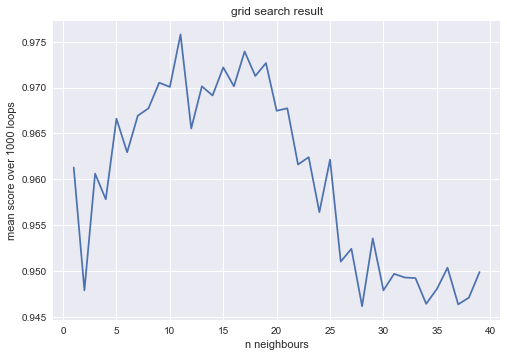

In [250]:
plt.plot(neighbours_range, results)
plt.xlabel("n neighbors")
plt.ylabel("mean score over {} loops".format(n_loops))
plt.title("grid search result")
plt.show()

**MNIST**

In [190]:
mnist = fetch_mldata('MNIST original')

In [233]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [242]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [247]:
%time clf.fit(X_train, y_train)

CPU times: user 39.3 s, sys: 431 ms, total: 39.7 s
Wall time: 39.8 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [243]:
%time my_clf.fit(X_train, y_train)

CPU times: user 13 µs, sys: 1e+03 ns, total: 14 µs
Wall time: 21 µs


In [195]:
%time clf.predict(X_test)

CPU times: user 1min 7s, sys: 85.4 ms, total: 1min 7s
Wall time: 1min 7s


array([ 6.,  1.,  7.,  4.,  7.,  6.,  2.,  5.,  5.,  2.,  4.,  4.,  3.,
        7.,  0.,  4.,  8.,  1.,  1.,  9.,  3.,  5.,  4.,  1.,  2.,  2.,
        6.,  8.,  9.,  5.,  2.,  2.,  3.,  5.,  9.,  0.,  4.,  0.,  6.,
        5.,  3.,  4.,  9.,  0.,  1.,  0.,  5.,  6.,  6.,  3.,  2.,  6.,
        7.,  4.,  9.,  3.,  6.,  0.,  6.,  0.,  9.,  9.,  1.,  9.,  8.,
        0.,  6.,  1.,  7.,  1.,  4.,  0.,  6.,  6.,  1.,  8.,  3.,  1.,
        2.,  1.,  0.,  5.,  8.,  8.,  7.,  7.,  9.,  6.,  5.,  2.,  2.,
        7.,  8.,  1.,  8.,  3.,  9.,  4.,  2.,  3.,  2.,  1.,  5.,  2.,
        2.,  4.,  5.,  3.,  3.,  1.,  2.,  4.,  4.,  1.,  1.,  6.,  7.,
        7.,  7.,  9.,  8.,  2.,  9.,  1.,  6.,  8.,  8.,  4.,  3.,  6.,
        7.,  2.,  1.,  1.,  6.,  4.,  9.,  7.,  8.,  2.,  1.,  9.,  1.,
        2.,  5.,  5.,  2.,  8.,  7.,  8.,  7.,  6.,  0.,  1.,  2.,  8.,
        2.,  2.,  6.,  3.,  2.,  7.,  9.,  2.,  3.,  8.,  3.,  8.,  3.,
        3.,  3.,  8.,  1.,  0.,  8.,  5.,  4.,  1.,  1.,  1.,  1

In [244]:
%time my_clf.predict(X_test)

CPU times: user 3.4 s, sys: 512 ms, total: 3.92 s
Wall time: 2.61 s


array([2, 5, 9, 2, 3, 8, 0, 8, 1, 8, 3, 9, 4, 9, 3, 5, 6, 7, 4, 8, 7, 2, 2,
       9, 3, 5, 1, 0, 7, 1, 0, 9, 0, 3, 8, 1, 0, 8, 9, 6, 8, 1, 9, 0, 3, 9,
       4, 1, 4, 6, 1, 3, 3, 8, 1, 7, 8, 6, 7, 2, 1, 2, 3, 5, 3, 2, 7, 5, 2,
       6, 0, 8, 2, 9, 9, 9, 5, 3, 1, 8, 4, 9, 9, 3, 2, 5, 0, 4, 6, 3, 7, 1,
       1, 0, 0, 9, 5, 2, 3, 7, 7, 8, 5, 2, 7, 1, 6, 1, 1, 0, 6, 3, 8, 2, 3,
       8, 6, 2, 0, 6, 1, 9, 4, 3, 4, 6, 0, 7, 3, 2, 7, 6, 6, 8, 1, 9, 5, 7,
       5, 4, 6, 7, 5, 8, 2, 7, 8, 6, 2, 3, 6, 5, 7, 1, 0, 1, 8, 7, 4, 6, 5,
       1, 4, 4, 7, 1, 4, 7, 3, 7, 3, 3, 2, 7, 8, 1, 9, 1, 1, 5, 0, 6, 1, 6,
       3, 1, 7, 8, 1, 4, 9, 3, 2, 1, 3, 2, 0, 9, 8, 2, 9, 9, 6, 9, 4, 2, 9,
       4, 7, 1, 3, 4, 0, 9, 3, 6, 3, 7, 2, 3, 9, 2, 2, 0, 5, 1, 4, 0, 9, 1,
       8, 9, 4, 1, 2, 3, 5, 2, 3, 1, 7, 9, 0, 0, 9, 7, 1, 1, 7, 1, 4, 5, 3,
       2, 2, 1, 4, 5, 5, 4, 7, 9, 5, 7, 3, 4, 3, 7, 6, 8, 1, 1, 7, 2, 4, 9,
       4, 3, 0, 7, 3, 9, 0, 1, 7, 0, 1, 9, 1, 6, 8, 4, 5, 5, 9, 4, 3, 6, 8,
       1, 7,

In [ ]:
%time clf.predict_proba(X_test)

In [ ]:
%time my_clf.predict_proba(X_test)

In [248]:
clf.score(X_test, y_test)

0.96857142857142853

In [245]:
my_clf.score(X_test, y_test)

0.96857142857142853

Задание 4

In [ ]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [ ]:
%time clf.fit(X_train, y_train)

In [ ]:
%time my_clf.fit(X_train, y_train)

In [ ]:
%time clf.predict(X_test)

In [ ]:
%time my_clf.predict(X_test)

In [ ]:
%time clf.predict_proba(X_test)

In [ ]:
%time my_clf.predict_proba(X_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
my_clf.score(X_test, y_test)

Задание 5

In [ ]:
# seaborn
# matplotlib
# train_test_split
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
# StandardScaler (from sklearn.preprocessing import StandardScaler)
# ClassifierMixin
# NeighborsBase
# KNeighborsMixin
# SupervisedIntegerMixin